<a href="https://colab.research.google.com/github/nabdeep-patel/SHARP-Images/blob/main/SHARP_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading and Plotting SHARP Images

In [ ]:
!pip install sunpy[all]
from IPython.display import clear_output
clear_output()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sunpy.map import Map
import matplotlib.pyplot as plt
from sunpy.net import Fido, attrs as a
import numpy as np
import os
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u

We will try to plot the full disk magnetogram for the time `2024-10-03 12:30, 2024-10-03 12:40`, because between that an X9 solar flare was observed.

In [ ]:
query = Fido.search(
    a.Time("2024-10-03T12:37", "2024-10-03T12:38"),
    a.Instrument("HMI"),
    a.Physobs("LOS_magnetic_field") | a.Physobs("intensity"))

In [ ]:
fulldisk = Fido.fetch(query,path="/content/fulldisk/")

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

hmi.ic_45s.2024.10.03_12_38_15_TAI.continuum.fits:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

hmi.ic_45s.2024.10.03_12_39_00_TAI.continuum.fits:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

hmi.m_45s.2024.10.03_12_39_00_TAI.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.2024.10.03_12_38_15_TAI.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

In [ ]:
fits.open(fulldisk[1])[1].data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

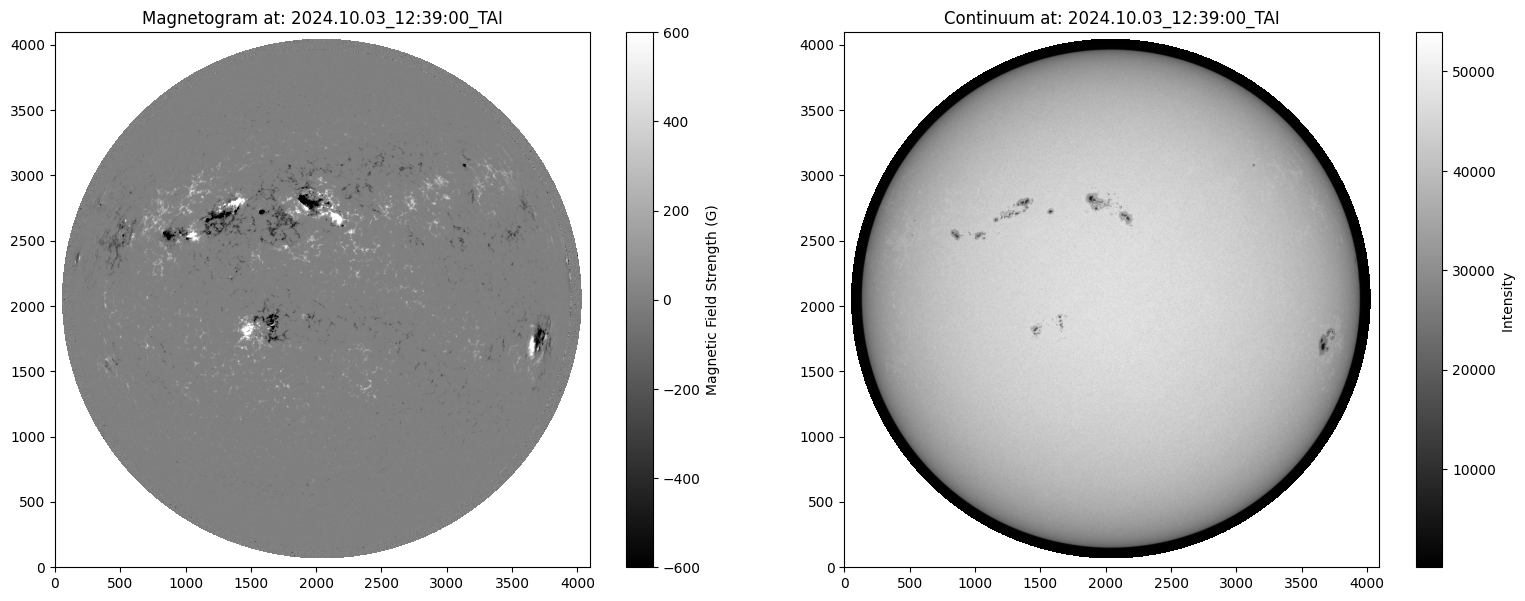

In [ ]:
plt.figure(figsize=(16, 6))

# Plot magnetogram image
plt.subplot(1, 2, 1)
plt.imshow(fits.open(fulldisk[1])[1].data, origin="lower", vmin=-600, vmax=600, cmap="grey")
plt.title(f"Magnetogram at: {fits.open(fulldisk[1])[1].header['t_rec']}")
plt.colorbar(label="Magnetic Field Strength (G)")

# Plot continuum image
plt.subplot(1, 2, 2)
plt.imshow(fits.open(fulldisk[3])[1].data, origin="lower", cmap="grey")
plt.title(f"Continuum at: {fits.open(fulldisk[1])[1].header['t_rec']}")
plt.colorbar(label="Intensity ")

plt.tight_layout()
plt.show()

In [ ]:
fits.open(fulldisk[1])[1].header

XTENSION= 'IMAGE   '           / binary table extension                         
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
DATE    = '2024-10-07T09:31:39'                                                 
DATE-OBS= '2024-10-03T12:38:00.80'                                              
TELESCOP= 'SDO/HMI'                                                             
INSTRUME= 'HMI_FRONT2'                                                          
WAVELNTH= 6173.0                                                                
CAMERA  =                   

In [ ]:
query = Fido.search(
    a.jsoc.Time("2024-10-03T12:37", "2024-10-03T12:38"),
    a.jsoc.Series("hmi.sharp_cea_720s"),
    *[a.jsoc.Segment(seg) for seg in ["magnetogram","Bp","Br","Bt"]],
    a.jsoc.Notify("nabdeeppatel@gmail.com"))

In [ ]:
os.makedirs("hmi.sharp")
sharp = Fido.fetch(query,path="hmi.sharp")

INFO:sunpy:52 URLs found for download. Full request totaling 47MB


INFO: 52 URLs found for download. Full request totaling 47MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/52 [00:00<?, ?file/s]

hmi.sharp_cea_720s.11930.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/5.54M [00:00<?, ?B/s]

hmi.sharp_cea_720s.11930.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/9.25M [00:00<?, ?B/s]

hmi.sharp_cea_720s.11930.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/9.60M [00:00<?, ?B/s]

hmi.sharp_cea_720s.11930.20241003_123600_TAI.Br.fits:   0%|          | 0.00/9.13M [00:00<?, ?B/s]

hmi.sharp_cea_720s.11955.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11955.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/343k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11955.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/377k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11955.20241003_123600_TAI.Br.fits:   0%|          | 0.00/372k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11962.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/80.6k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11962.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/124k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11962.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/130k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11962.20241003_123600_TAI.Br.fits:   0%|          | 0.00/124k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11968.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/372k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11968.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/590k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11968.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/590k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11968.20241003_123600_TAI.Br.fits:   0%|          | 0.00/539k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11995.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/665k [00:00<?, ?B/s]

hmi.sharp_cea_720s.11995.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

hmi.sharp_cea_720s.11995.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

hmi.sharp_cea_720s.11995.20241003_123600_TAI.Br.fits:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

hmi.sharp_cea_720s.12000.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12000.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12000.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12000.20241003_123600_TAI.Br.fits:   0%|          | 0.00/69.1k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12001.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/611k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12001.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

hmi.sharp_cea_720s.12001.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

hmi.sharp_cea_720s.12001.20241003_123600_TAI.Br.fits:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

hmi.sharp_cea_720s.12003.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/170k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12003.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/279k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12003.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/271k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12003.20241003_123600_TAI.Br.fits:   0%|          | 0.00/268k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12006.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12006.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/43.2k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12006.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/43.2k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12006.20241003_123600_TAI.Br.fits:   0%|          | 0.00/40.3k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12009.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/127k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12009.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12009.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/213k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12009.20241003_123600_TAI.Br.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12011.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/89.3k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12011.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/135k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12011.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/138k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12011.20241003_123600_TAI.Br.fits:   0%|          | 0.00/132k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12014.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/294k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12014.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/340k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12014.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/389k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12014.20241003_123600_TAI.Br.fits:   0%|          | 0.00/374k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12015.20241003_123600_TAI.magnetogram.fits:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12015.20241003_123600_TAI.Bp.fits:   0%|          | 0.00/40.3k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12015.20241003_123600_TAI.Bt.fits:   0%|          | 0.00/40.3k [00:00<?, ?B/s]

hmi.sharp_cea_720s.12015.20241003_123600_TAI.Br.fits:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

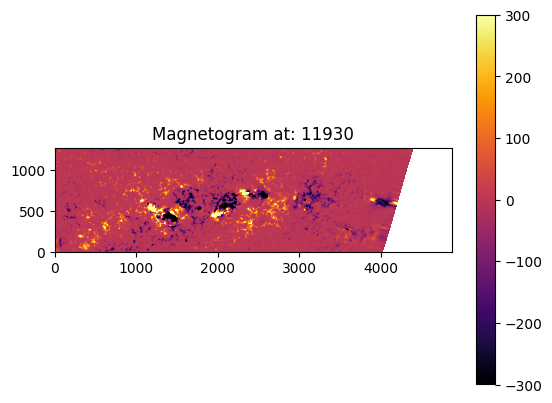

In [ ]:
file = "/content/hmi.sharp/hmi.sharp_cea_720s.11930.20241003_123600_TAI.magnetogram.fits"
plt.imshow(fits.open(file)[1].data, origin="lower",vmin=-300, vmax=300, cmap="inferno")
plt.title(f"Magnetogram at: {fits.open(file)[1].header['HARPNUM']}")
plt.colorbar()

In [ ]:
fits.open(file)[1].header["NOAA_ARs"]

'13834,13835,13836,13839,13842,13843,13844,13846,13847'

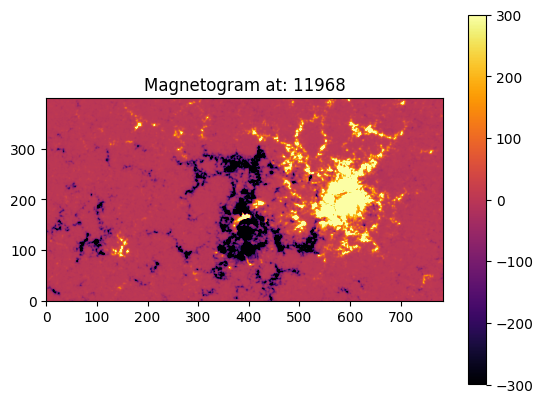

In [ ]:
file = "/content/hmi.sharp/hmi.sharp_cea_720s.11968.20241003_123600_TAI.magnetogram.fits"
plt.imshow(fits.open(file)[1].data, vmin=-300, vmax=300,origin="lower", cmap="inferno")
plt.title(f"Magnetogram at: {fits.open(file)[1].header['HARPNUM']}")
plt.colorbar()

Text(0.5, 1.0, 'Theta component of Magnetic field')

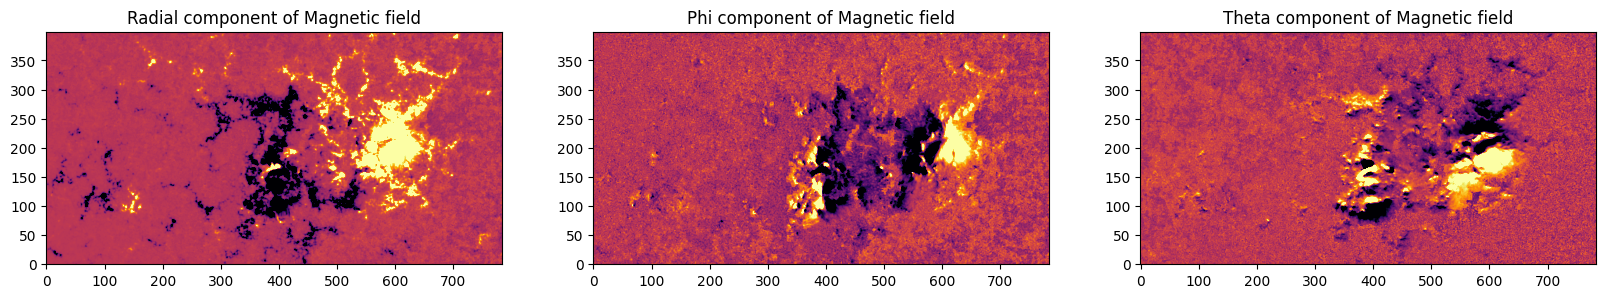

In [ ]:
plt.figure(figsize=(20, 6))
Bp = "/content/hmi.sharp/hmi.sharp_cea_720s.11968.20241003_123600_TAI.Bp.fits"
Br = "/content/hmi.sharp/hmi.sharp_cea_720s.11968.20241003_123600_TAI.Br.fits"
Bt = "/content/hmi.sharp/hmi.sharp_cea_720s.11968.20241003_123600_TAI.Bt.fits"

plt.subplot(1, 3, 1)
plt.imshow(fits.open(Br)[1].data, vmin=-300, vmax=300, origin="lower", cmap="inferno")
plt.title(f"Radial component of Magnetic field")

plt.subplot(1, 3, 2)
plt.imshow(fits.open(Bp)[1].data, vmin=-300, vmax=300, origin="lower", cmap="inferno")
plt.title(f"Phi component of Magnetic field")

plt.subplot(1, 3, 3)
plt.imshow(fits.open(Bt)[1].data, vmin=-300, vmax=300, origin="lower", cmap="inferno")
plt.title(f"Theta component of Magnetic field")

In [ ]:
fits.open(Br)[1].header["USFLUX"]

1.77084566e+22

In [ ]:
fits.open(Bp)[1].header["USFLUX"]

1.77084566e+22

In [ ]:
fits.open(Bt)[1].header["USFLUX"]

1.77084566e+22

In [ ]:
fits.open(file)[1].header["USFLUX"]

1.77084566e+22

In [ ]:
fits.open(file)[1].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                  784 / length of original image axis                  
NAXIS2  =                  400 / length of original image axis                  
BLANK   =          -2147483648                                                  
BZERO   =                   0.                                                  
BSCALE  =                  0.1                                                  
CHECKSUM= 'GP4kGP4kGP4kGP4k'   / HDU checksum updated 2024-11-25T15:56:33       
DATASUM = '3426318326'         / data unit checksum updated 2024-11-19T18:15:59 
DATE    = '2024-11-19T18:15:44.000' / [ISO] HDU creation date                   
DATE_S  = '2024-10-07T08:51:51.000' / [ISO] Date_time of generating Stokes data 
DATE_B  = '2024-10-08T08:50:

In [23]:
# prompt: save all folders to github

# You can't directly save Colab's entire file system to a GitHub repository in a single command.
# You'll need to create a Git repository on your local machine or on GitHub, and then add the files from Colab to it.

# 1. (If not already done) Create a new GitHub repository.
# 2. Initialize a Git repository in your Colab environment:
!git init

# 3.  Add the files you want to commit to the repository.  In your case, likely everything except the .git folder itself.
# For example, to include all the files in the current directory:
!git add .
# or to be specific:
# !git add fulldisk/ hmi.sharp/

# 4. Commit your changes:
!git config --global user.email "your_email@example.com"
!git config --global user.name "Your Name"
!git commit -m "Initial commit of solar flare data"

# 5. Connect the Colab repository to your remote GitHub repository.
# Replace "your_username" and "your_repository_name" with your actual GitHub credentials:
!git remote add origin https://github.com/nabdeep-patel/SHARP-Images.git

# 6. Push your committed changes to GitHub:
!git push -u origin master # If your default branch is 'main', use '!git push -u origin main' instead

# Important Considerations:
# * Large Files:  GitHub has file size limits.  If your data files are large, consider using Git Large File Storage (LFS).
#   You would need to install the Git LFS client in Colab and then track those files using LFS.
# * .gitignore: Create a .gitignore file in your Colab environment to exclude any unnecessary files (like temporary files, or large files) to be committed to the repository.
# * Authentication:  You might encounter authentication issues when pushing. To solve this, you might need to use Personal Access Tokens (PATs) in your push command.
# * Drive Mounting: If files are stored in Google Drive, download them locally and include them with git add . in the current folder.

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
[master (root-commit) b36bc7a] Initial commit
 77 files changed, 537436 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/g